In [109]:
import pandas as pd
import numpy as np


# Data Acquision

In [110]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin-1')

In [111]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [112]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [113]:
df.shape

(5572, 5)

In [114]:
df.duplicated().sum()

403

In [115]:
df.drop_duplicates(inplace=True)

In [116]:
df.duplicated().sum()

0

In [117]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [118]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [119]:
df.columns=['spam','text']

In [120]:
df.head()

,spam,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [121]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize,sent_tokenize

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [122]:
from nltk.corpus import stopwords

In [123]:
sw=stopwords.words('english')

In [124]:
df['n_words']=df['text'].apply(lambda text : len([text for text in word_tokenize(text)]))
df['n_sentences']=df['text'].apply(lambda text : len([text for text in sent_tokenize(text)]))
df['length_sentence']=df['text'].apply(len)

In [125]:
df.head()

,spam,text,n_words,n_sentences,length_sentence
0,ham,"Go until jurong point, crazy.. Available only ...",23,2,111
1,ham,Ok lar... Joking wif u oni...,8,2,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
3,ham,U dun say so early hor... U c already then say...,13,1,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",15,1,61


# EDA

In [126]:
df[df['spam']=='']

,spam,text,n_words,n_sentences,length_sentence


In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
df[df['spam']=='ham']['n_words']

0       23
1        8
3       13
4       15
6       18
        ..
5565     4
5568     9
5569    15
5570    27
5571     7
Name: n_words, Length: 4516, dtype: int64

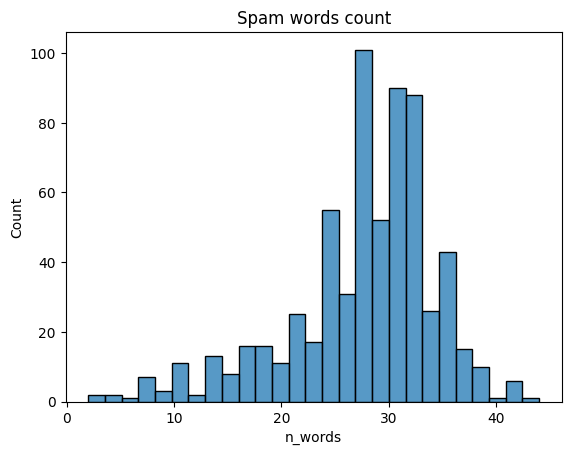

In [129]:
sns.histplot(x=df[df['spam']=='spam']['n_words'],data=df) # histogram for label 1
plt.title('Spam words count')
plt.show()

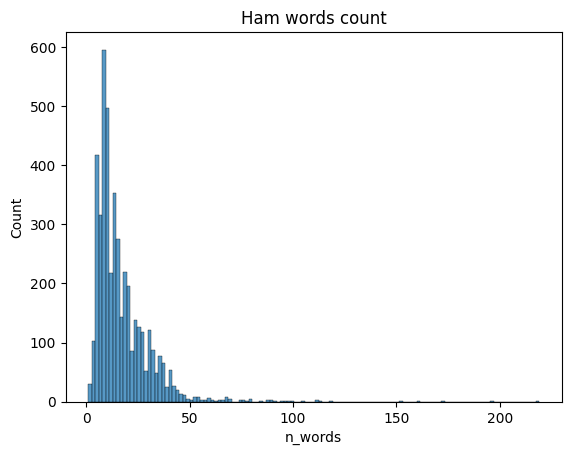

In [130]:
sns.histplot(x=df[df['spam']=='ham']['n_words'],data=df) # histogram for label 1
plt.title('Ham words count')
plt.show()

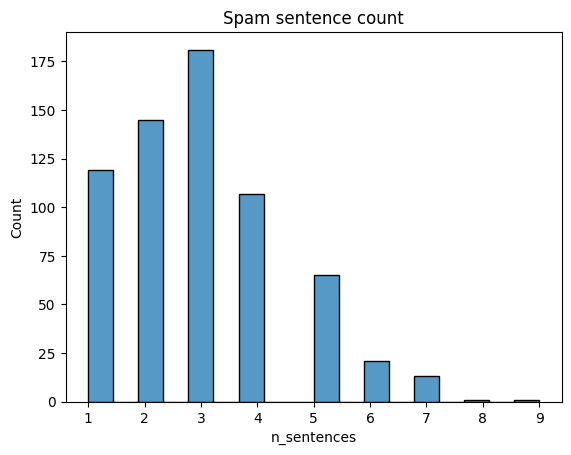

In [131]:
sns.histplot(x=df[df['spam']=='spam']['n_sentences'],data=df) # histogram for label 1
plt.title('Spam sentence count')
plt.show()

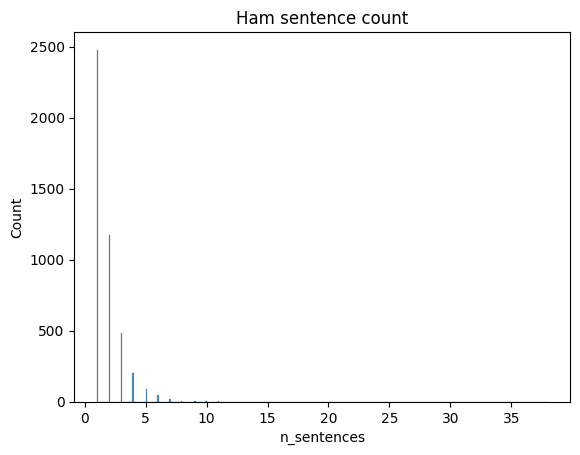

In [132]:
sns.histplot(x=df[df['spam']=='ham']['n_sentences'],data=df) # histogram for label 1
plt.title('Ham sentence count')
plt.show()

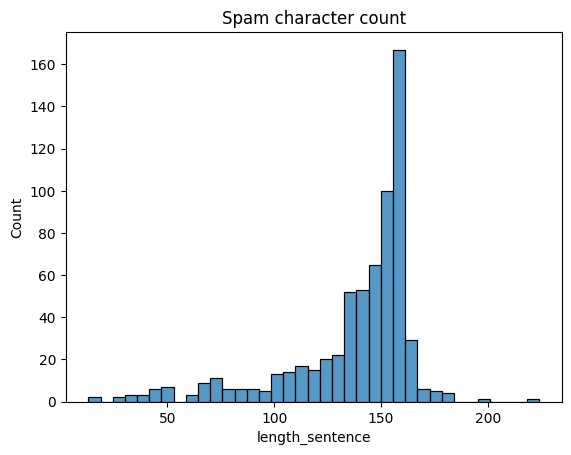

In [133]:
sns.histplot(x=df[df['spam']=='spam']['length_sentence'],data=df) # histogram for label 1
plt.title('Spam character count')
plt.show()

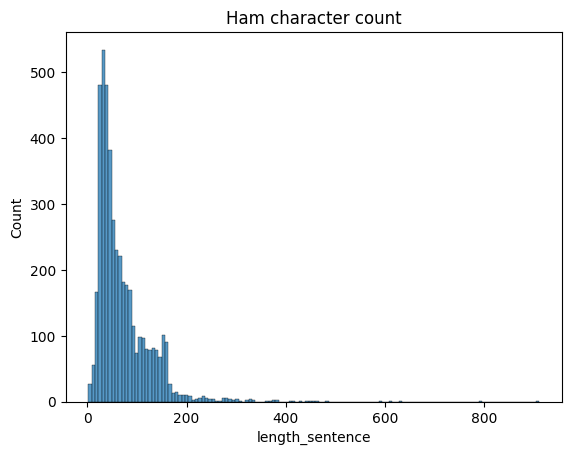

In [134]:
sns.histplot(x=df[df['spam']=='ham']['length_sentence'],data=df) # histogram for label 1
plt.title('Ham character count')
plt.show()

### After cleaning we will make the word cloud

In [135]:
# After cleaning we will make the word cloud

# Data Preprocessing

In [136]:
stemmer=PorterStemmer()

In [137]:
import string 

In [138]:
string.punctuation[:50]

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [139]:
'''
1. Lower 
2. Stopwords or punctuation
3. Stemming and Lemmatization
4. Feature Extraction
'''
def preprocess_text(text):
    text=text.lower()
    sentences = sent_tokenize(text)
    list_words = [word_tokenize(sentence) for sentence in sentences]
    cleaned_words = [
        stemmer.stem(word)
        for words in list_words
        for word in words
        if word not in sw and word not in string.punctuation
    ]
    return " ".join(cleaned_words)

In [140]:
def clean_words(text):
    text = text.lower()
    text = text.replace("...", "")  # Remove "..."
    
    sentences = sent_tokenize(text)
    sw = set(stopwords.words('english'))
    stemmer = PorterStemmer()  # Initialize the stemmer
    
    list_words = [word_tokenize(sentence) for sentence in sentences]
    
    cleaned_words = [
        re.sub(r'-(?=\w)', ' ', stemmer.stem(expand_shorthand(word)))
        for words in list_words
        for word in words
        if word not in sw and word not in string.punctuation
    ]
    return " ".join(cleaned_words)

In [141]:
preprocess_text("I am A GOOOD boy,I am happy")

'goood boy happi'

In [142]:
df['cleaned_text']=df['text'].apply(preprocess_text)

In [143]:
df.head()

,spam,text,n_words,n_sentences,length_sentence,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",23,2,111,go jurong point crazy.. avail bugi n great wor...
1,ham,Ok lar... Joking wif u oni...,8,2,29,ok lar ... joke wif u oni ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,13,1,49,u dun say earli hor ... u c alreadi say ...
4,ham,"Nah I don't think he goes to usf, he lives aro...",15,1,61,nah n't think goe usf live around though


## Further EDA

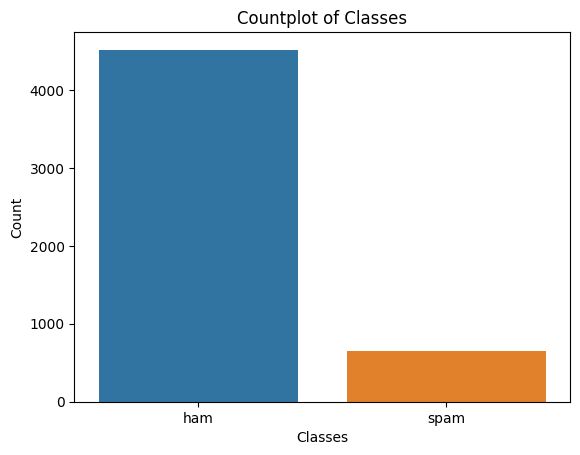

In [144]:
sns.countplot(x='spam', data=df)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Countplot of Classes')
plt.show()

In [145]:
from collections import Counter

In [146]:
from wordcloud import WordCloud

In [147]:
wordcloud=WordCloud(width=1000,height=800,min_font_size=12,background_color='black')

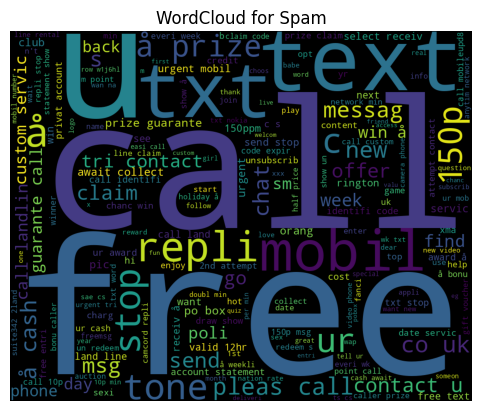

In [148]:
word_count_spam = wordcloud.generate(df[df['spam'] == 'spam']['cleaned_text'].str.cat(sep=" ")) # Generating for spam
plt.imshow(word_count_spam)
plt.axis('off')
plt.title('WordCloud for Spam')
plt.show()

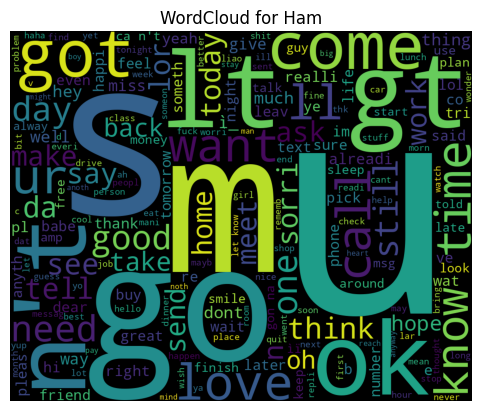

In [149]:
word_count_spam = wordcloud.generate(df[df['spam'] == 'ham']['cleaned_text'].str.cat(sep=" ")) # Generating for spam
plt.imshow(word_count_spam)
plt.axis('off')
plt.title('WordCloud for Ham')
plt.show()

In [150]:
spam_corpus = [word  for text in df[df['spam'] == 'spam']['cleaned_text'].tolist() for word in text.split()]
ham_corpus =  [word  for text in df[df['spam'] == 'ham']['cleaned_text'].tolist() for word in text.split()]
print(len(ham_corpus), len(spam_corpus))

39404 11068


In [151]:
spam_dict=Counter(spam_corpus)
ham_dict=Counter(ham_corpus)

In [152]:
spam_dataFrame=pd.DataFrame(spam_dict.most_common(20))
ham_dataFrame=pd.DataFrame(ham_dict.most_common(20))

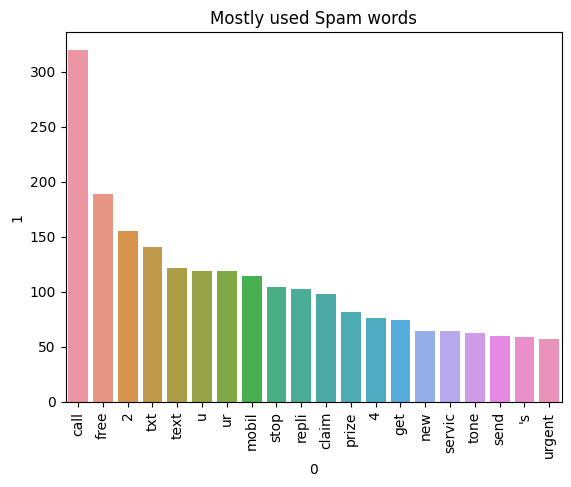

In [153]:
sns.barplot(x=spam_dataFrame[0],y=spam_dataFrame[1])
plt.xticks(rotation='vertical')
plt.title('Mostly used Spam words')
plt.show()

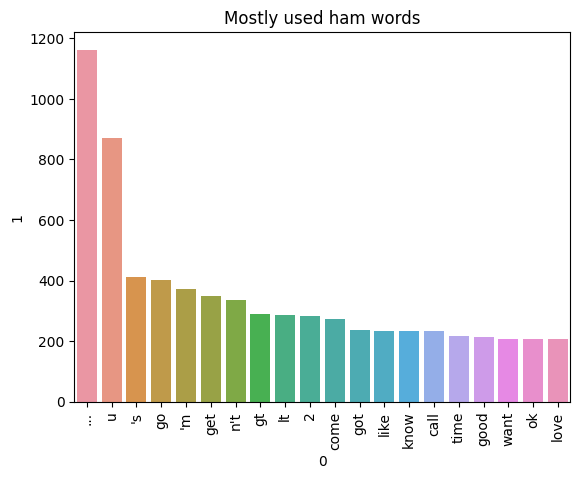

In [154]:
sns.barplot(x=ham_dataFrame[0],y=ham_dataFrame[1])
plt.xticks(rotation='vertical')
plt.title('Mostly used ham words')
plt.show()

In [155]:
df['spam']=df['spam'].map({'spam':1,'ham':0})

## Vectorization and Feature Extraction

In [156]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [157]:
tfidf_vectorizer = TfidfVectorizer()

In [158]:
x=df['text']
y=df['spam']

In [159]:
x_tfidf = tfidf_vectorizer.fit_transform(x).toarray()

In [160]:
from imblearn.over_sampling import SMOTE

In [161]:
smote = SMOTE(sampling_strategy=0.5,random_state=42)
x_res, y_res = smote.fit_resample(x_tfidf, y)

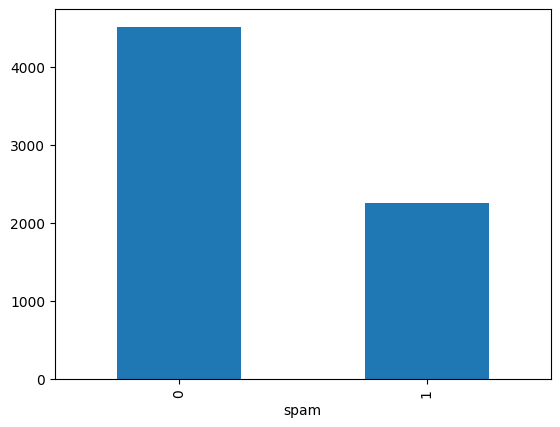

In [162]:
y_res.value_counts().plot(kind='bar')
plt.show()

In [163]:
df['spam']=df['spam'].map({'spam':1,'ham':0})

In [164]:
from sklearn.model_selection import train_test_split

In [165]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,train_size=0.9,random_state=42)

In [166]:
x_train.shape,x_test.shape

((6096, 8672), (678, 8672))

In [167]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [168]:
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
lr = LogisticRegression(solver='liblinear', penalty='l1')
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [169]:
algos={
    'MNB':mnb,
    'GNB':gnb,
    'BNB':bnb,
    'SVC':svc,
    'KNC':knc,
    'LR':lr,
    'DTC':dtc,
    'RFC':rfc,
    'ABC':abc,
    'XGB':xgb,
    'BC':bc,
    'ETC':etc
}

In [170]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [171]:
prec_acc = {}
for name, algo in algos.items():
    algo.fit(x_train, y_train)
    y_pred = algo.predict(x_test)
    prec_acc[name] = {
        'Precision': precision_score(y_test, y_pred),
        'Accuracy': accuracy_score(y_test, y_pred)
    }

In [172]:
prec_acc

{'MNB': {'Precision': 0.9910714285714286, 'Accuracy': 0.9882005899705014},
 'GNB': {'Precision': 0.8533834586466166, 'Accuracy': 0.9410029498525073},
 'BNB': {'Precision': 1.0, 'Accuracy': 0.9837758112094396},
 'SVC': {'Precision': 0.9955555555555555, 'Accuracy': 0.9926253687315634},
 'KNC': {'Precision': 1.0, 'Accuracy': 0.9646017699115044},
 'LR': {'Precision': 0.972972972972973, 'Accuracy': 0.9734513274336283},
 'DTC': {'Precision': 0.9569377990430622, 'Accuracy': 0.9454277286135693},
 'RFC': {'Precision': 1.0, 'Accuracy': 0.9852507374631269},
 'ABC': {'Precision': 0.9605263157894737, 'Accuracy': 0.9734513274336283},
 'XGB': {'Precision': 0.995475113122172, 'Accuracy': 0.9867256637168141},
 'BC': {'Precision': 0.9732142857142857, 'Accuracy': 0.976401179941003},
 'ETC': {'Precision': 1.0, 'Accuracy': 0.9896755162241888}}

# Result

### Almost all the algorithms have performed well , we can choose any but we can take ExtraTreeClassifier model because of its Precision as 1.

In [174]:
prec_acc['ETC']['Precision']

1.0

In [175]:
prec_acc['ETC']['Accuracy']

0.9896755162241888